# PC Lab 2: Nearest neighbour and data preprocessing
Predictive modelling 


## Introduction
In our previous lab session, we explored the iris dataset. In this dataset, there are no missing values in the variable "Species". But what if there are new observations without a value in the "Species" variable? So, imagine the case that for a 'new' iris flower we know the values for the other columns (sepal/petal length and height) but 
it is unknown to which of the three species it belongs to (dataset irisNA.csv). A natural task would be
to try to guess to which species each of the new flowers belongs to. This task
(or problem) is called a classification problem in machine learning. In this practical exercise session, a first
simple algorithm that provides an answer to this problem is described.
### Notations and vocabulary
In the iris dataset (iris120.csv), each instance (each flower is an instance) is described by five properties:
the species it belongs to, the width of its petals, the length of its petals, the width of its sepals and the
length of its sepals. In this PC-lab, for simplicity, only species, sepal length and sepal width will be used.
These properties can be seen as variables, and for a given flower, each of these variables takes a specific
value. In a classification setting, the aim is to predict the value of one of the variables (here the species),
based on the value of the other variables (here petal width and length). The variable of which the values
have to be predicted is called the output variable and the variables used to make this prediction are called
the input variables or features. A dataset consists of a set of observations of input-output couples $(\boldsymbol{x}, y)$. In this dataset, the observed values
for the features of the $i$-th instance are denoted $\boldsymbol{x_i}$ $= (x_{i1}, ... , x_{ip})^T$ , where $p$ the number of features, and the observed value of its output
is denoted $y_i$. Using this notation, a training dataset $T$ containing $n$ instances can be written as $$T = \{(\boldsymbol{x_1}, y_1), ... , (\boldsymbol{x_n}, y_n)\}.$$
Using this dataset, we will try to build a model (generally denoted $f$) that is able to predict the value of the
output variable, based on the value of the input variables. When this output variable is nominal, this process
is called a classification problem.    
In the iris problem, both input variables take real values $(\boldsymbol{x_i} \in \mathbb{R}^2)$. The output variable, however, is
nominal, it takes values from a finite set $\{setosa, versicolor, virginica\}$. Because of this, the model $\textit{f}$ we are
looking for is one which performs a mapping $$\textit{f} : \mathbb{R}^2 \rightarrow  \{setosa, versicolor, virginica\}.$$   
### Nearest neighbour for classification
Several techniques exist that are capable of deriving classification models from data. A very simple one is
the nearest neighbour model. This model departs from the assumption that instances whose features are
highly similar, are likely to have the same labels. The one nearest neighbour (1-NN) model applies this
idea in its most extreme form: the label for an instance (with unknown label) is predicted as the label of the
closest instance in the training dataset.   
To be able to select the ‘closest’ instance in the training dataset, a distance measure has to be defined. In
this text, we will use $d(\boldsymbol{x_i}, \boldsymbol{x_j})$ to denote the distance between two feature vectors $\boldsymbol{x_i}$ and $\boldsymbol{x_j}$. As a simple
distance measure, the Euclidean distance can be used
$$d_E(\boldsymbol{x_i}, \boldsymbol{x_j}) = \sqrt{\sum_{k=1}^{p} (x_{i,k} - x_{j,k})^2}$$
Using this distance function, the nearest neighbour algorithm performs the following steps:
1. For an instance with unknown label and known feature vector $\boldsymbol{x}$, calculate the distance to each instance in the dataset: $d_E(\boldsymbol{x}, \boldsymbol{x_i})$ where $i = 1, ... ,n.$
2. Select the closest instance and take its label as the prediction for the unknown label.


<div class="alert alert-success">

<b>EXERCISE</b>: **Load the dataset iris120.csv in to the memory and select the columns 'Sepal.Length', 'Sepal.Width', and 'Species'. Additionally, load the set of unclassified
instances (irisNA.csv) and select the same columns. Both datasets should be loaded as data frames. **
</div>


In [1]:
import numpy as np
import pandas as pd
iris120 = pd.read_csv('iris120.csv')
irisNA = pd.read_csv('irisNA.csv')

iris120_2col = iris120[['Sepal.Length', 'Sepal.Width', 'Species']]
irisNA_2col = irisNA[['Sepal.Length', 'Sepal.Width', 'Species']]
irisNA_2col.head()

,Sepal.Length,Sepal.Width,Species
0,5.4,3.9,NaN
1,5.0,3.4,NaN
2,5.8,4.0,NaN
3,5.4,3.9,NaN
4,4.4,3.0,NaN



<div class="alert alert-success">

<b>EXERCISE</b>: **Implement the nearest neighbour algorithm for the iris problem in a function called nnIrisPredict.
Use this function to predict the species of unknown flowers irisNA.csv in the dataset. Make sure
your function has the following structure:**
</div>


In [2]:
def nnIrisPredict(featuresNewInstance, trainDataset):
#...
    dist = np.sqrt((featuresNewInstance['Sepal.Length'] - trainDataset.iloc[:]['Sepal.Length'])**2+(featuresNewInstance['Sepal.Width']
                                                                                                - trainDataset.iloc[:]['Sepal.Width'])**2)
    nn = np.argmin(dist)
    label = trainDataset.iloc[nn]['Species']
    return (label)

new_observation = irisNA_2col.iloc[10][0:2]
train = iris120_2col
nnIrisPredict(new_observation, train)


'virginica'

where trainDataset is a data frame (containing flowers with known species label) with columns
"Sepal.Length", "Sepal.Width" and "Species". featuresNewInstance is a vector with the sepal
length in the first position and the sepal width in the second position. Label should be one of the
strings "setosa", "versicolor" and "virginica".

## The nearest neighbour algorithm for regression
In the previous section, the output was a nominal variable (no numerical values, specific classes). When the output is real-valued, the prediction problem is called a regression problem. As with nominal outputs, the nearest neighbour algorithm can
be used to predict the output variable of unlabeled instances. The algorithm is identical to the one for
classification, however, the prediction will be the real-valued label of the closest instance in the training
dataset instead of its class label.

## Data preprocessing
In this section, some elementary data preprocessing steps are described.
### Dummy encoding of nominal variables
The basic nearest neighbour algorithm implemented in the previous assignment can only be used with
numerical features. However, often types of variables such as nominal variables or ordinal variables are
present. A simple solution to this problem exists in using a dummy encoding for each nominal variable.
When a variable $\boldsymbol{x^i}$ is nominal with $k$ values, it is replaced by $k$ new binary variables. As an example,
consider the weather dataset, here the variable "Outlook" ($\boldsymbol{x^1}$) has three values: Sunny, Overcast and Rainy.
Each of these values is represented by a dummy variable: $\boldsymbol{x^{1a}}$, $\boldsymbol{x^{1b}}$ and $\boldsymbol{x^{1c}}$ with the following values:   
  *  $x^{1a} = 1$ if $x^1 = "Sunny"$ and  $x^{1a} = 0$ otherwise
  * $x^{1b} = 1$ if $x^1 = "Overcast"$ and $x^{1b} = 0$ otherwise
  * $x^{1c} = 1$ if $x^1 = "Rainy"$ and $x^{1c} = 0$ otherwise
  
See the following example in python. In this example, we use  the Abalone dataset (abaloneTrain700.csv) which contains measurements of physical properties of several abalone (an edible sea snail) specimen. Using these physical properties, the aim is to build a predictive model for the age of these animals (more information concerning this dataset can be found in [abalone.info](https://archive.ics.uci.edu/ml/datasets/Abalone)). In the following example, we replace the nominal variable 'sex' with 3 dummy variables (as many as the values it takes). In python, there are functions such as the [get_dummies()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) function which are used for this purpose. So firstly, we create the dummy variables, then we concatenate them with the original dataset and finally we remove the original variable form the dataset. 

In [3]:
data = pd.read_csv('abaloneTrain700.csv')
data.head()

,sex,length,diameter,height,wholeWeight,shuckedWeight,visceraWeight,shellWeight,age
0,I,0.665,0.500,0.170,1.2975,0.6035,0.2910,0.3595,9
1,F,0.460,0.365,0.115,0.4485,0.1650,0.0830,0.1700,14
2,F,0.560,0.445,0.180,0.9030,0.3575,0.2045,0.2950,9
3,I,0.395,0.300,0.090,0.2790,0.1340,0.0490,0.0750,8
4,I,0.530,0.400,0.145,0.5550,0.1935,0.1305,0.1950,9


In [4]:
#load dataset
data = pd.read_csv('abaloneTrain700.csv')
dummies = pd.get_dummies(data.sex) # create dummies
print(dummies.head())
data_with_dummies = pd.concat([data, dummies], axis=1) #  concatenate them with the dataset
data_with_dummies = data_with_dummies.drop(['sex'], axis=1) # remove the original sex column
data_with_dummies.head()

   F  I  M
0  0  1  0
1  1  0  0
2  1  0  0
3  0  1  0
4  0  1  0


,length,diameter,height,wholeWeight,shuckedWeight,visceraWeight,shellWeight,age,F,I,M
0,0.665,0.500,0.170,1.2975,0.6035,0.2910,0.3595,9,0,1,0
1,0.460,0.365,0.115,0.4485,0.1650,0.0830,0.1700,14,1,0,0
2,0.560,0.445,0.180,0.9030,0.3575,0.2045,0.2950,9,1,0,0
3,0.395,0.300,0.090,0.2790,0.1340,0.0490,0.0750,8,0,1,0
4,0.530,0.400,0.145,0.5550,0.1935,0.1305,0.1950,9,0,1,0


### Missing values
Missing values are commonly encountered in data mining studies. Often, missing values are imputed
(replaced by a value). Several techniques exist to choose this value. A simple, but often used method
is mean imputation. Here, each missing value is replaced by the mean of the observed values for
that variable. More advanced methods exist of building separate models to predict the missing
values.
When implementing the mean imputation, the [Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) of scikit-learn library might be handy.

In [5]:
data_with_dummies.isnull().values.sum(axis=0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Standardizing the data
In realistic datasets, most features have different means and standard deviations. For the nearest
neighbour algorithm, it can easily be seen that features with a high standard deviation will be more
influential than features with a lower standard deviation. In most cases, this is unwanted since it
is not known in advance which features are most important. To overcome this problem, features
are often standardized. The standardized version of $x^i$ can be obtained as   
$$\frac{x^i - \mu_i}{\sigma_i}$$    
where $\mu_i$ and $\sigma_i$ represent the sample mean and standard deviation of $\boldsymbol{x^i}$.
The [Scaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) of scikit-learn can be used to perform this standardizing

In [6]:
from sklearn.preprocessing import StandardScaler

y = data_with_dummies['age'] # keep the target variable
data_with_dummies = data_with_dummies.drop(['age'], axis=1) # remove it from the feature set
data_with_dummies.head()

scaler = StandardScaler()
scaler.fit(data_with_dummies)
data_scaled = scaler.transform(data_with_dummies)

data_scaled

array([[ 1.27945836,  1.01101707,  0.88165536, ..., -0.63466969,
         1.39770759, -0.77341678],
       [-0.53327082, -0.42969941, -0.61663338, ...,  1.57562275,
        -0.71545723, -0.77341678],
       [ 0.35098732,  0.4240585 ,  1.15407149, ...,  1.57562275,
        -0.71545723, -0.77341678],
       ...,
       [ 0.57205185,  0.53077824,  0.20061502, ..., -0.63466969,
        -0.71545723,  1.29296393],
       [-0.09114175, -0.16290006, -0.07180111, ..., -0.63466969,
        -0.71545723,  1.29296393],
       [-2.16914836, -2.19057509, -1.97871405, ..., -0.63466969,
         1.39770759, -0.77341678]])

<div class="alert alert-success">

<b>EXERCISE</b>: **To prepare the datasets abaloneTrain700.csv and abaloneTest700.csv for analysis, perform
the preprocessing steps described in the previous section (more information concerning this
dataset can be found in [abalone.info](https://archive.ics.uci.edu/ml/datasets/Abalone)).**
</div>

In [8]:
test = pd.read_csv('abaloneTest700.csv')
test_dummies = pd.get_dummies(test.sex) # create dummies
print(test_dummies.head())
test_with_dummies = pd.concat([test, test_dummies], axis=1) #  concatenate them with the dataset
test_with_dummies = test_with_dummies.drop(['sex'], axis=1) # remove the original sex column
test_with_dummies.head()
test_y = test_with_dummies['age'] # keep the target variable
test_with_dummies = test_with_dummies.drop(['age'], axis=1) # remove it from the feature set
test_with_dummies.head()

test_scaled = scaler.transform(test_with_dummies)

   F  I  M
0  1  0  0
1  0  1  0
2  0  0  1
3  0  1  0
4  0  1  0


## k-nearest-neighbours
A simple extension of the nearest neighbour algorithm consists of taking more than only the nearest
neighbour into account. Let $N_k(\boldsymbol{x}) \subset T$ be the k nearest neighbours of an instance with feature
vector $\boldsymbol{x}$. The k-nearest neighbour prediction $Y(\boldsymbol{x})$ can be determined as follows
1. For classification problems:  $Y(\boldsymbol{x})$ is set as the label that occurs most often in $N_k(\boldsymbol{x})$ (the
mode).
2. For regression problems, the average of the $k$ nearest outputs can be taken $Y(\boldsymbol{x}) = \frac{1}{k}\sum_{\boldsymbol{x_i} \in N_k(\boldsymbol{x})} y_i$    

### k-nearest-neighbours in python
As with the 1-nearest neighbour algorithm, it is possible to implement a version of the k-nearest neighbours
algorithm in python. However, an alternative is to use a pre-implemented version of this
algorithm. For most popular machine learning algorithms, these functions are packed in specific python
“packages". An implementation of
the k-nearest-neighbours algorithm is available in the [scikit-learn](http://scikit-learn.org/stable/) library (as well). 
You can load and see more info about the usage of this function by typing:

In [8]:
from sklearn import neighbors
help(neighbors.KNeighborsRegressor)

Help on class KNeighborsRegressor in module sklearn.neighbors._regression:

class KNeighborsRegressor(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.RegressorMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsRegressor(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
 |  
 |  Regression based on k-nearest neighbors.
 |  
 |  The target is predicted by local interpolation of the targets
 |  associated of the nearest neighbors in the training set.
 |  
 |  Read more in the :ref:`User Guide <regression>`.
 |  
 |  .. versionadded:: 0.9
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhoo

As you can see in the help window, in scikit-learn, an estimator for classification/regression is a Python object that implements the methods fit(X, y) and predict(T). The constructor of an estimator takes as arguments the parameters of the model (in our case the basic parameters are the number of neighbours and the distance metric). So the first step is to create a KNN instance:


In [7]:
knn = neighbors.KNeighborsRegressor(n_neighbors=5, metric = 'euclidean')

We call our estimator instance `knn`. It now must be fitted to the model, that is, it must learn from the model. This is done by passing our training set to the fit method. As a training set, let us use all the examples of the abalone dataset we loaded before as training set apart from the last one. We select this training set with the [:-1] Python syntax, which produces a new array that contains all but the last entry of the data.

In [8]:
knn.fit(data_scaled[:-1], y[:-1])

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

Now you can predict new values, in particular, we can ask to the estimator which is the class of our last example of the dataset, which we have not used to train the model:

In [9]:
y_pred = knn.predict(data_scaled[-1].reshape(1,-1))



### Prediction quality
To test the performance of the nearest neighbour algorithm, an option is to use test data with
known labels and to compare the predictions with these labels. In this case, we have two different
datasets, a training set T and a test set T$^*$. In case of a regression problem, the mean of squared
residuals is commonly used to evaluate the quality of a model. This measure is calculated as follows:   
1. Mean of squared residuals on test set:
$$Err_{T^*} = \frac{1}{|T^*|}\sum_{\boldsymbol{x_i} \in T^*} (Y(\boldsymbol{x_i}) - y_i)^2$$
2. Additionally, the error on the training data itself can be computed:   
$$Err_{T} = \frac{1}{|T|}\sum_{\boldsymbol{x_i} \in T} (Y(\boldsymbol{x_i}) - y_i)^2$$

Naturally, it is desirable to keep the mean of squared residuals as small as possible.


We can calculate the mean squared error of the prediction we get before (for the last example of the abalone dataset) by calculating it ourselves or by using the [mean_squared_error()](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) function of scikit-learn.

In [10]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_pred, [y.iloc[-1]])


0.6399999999999997

<div class="alert alert-success">

<b>EXERCISE</b>: **The abalone dataset was split in two subsets: abaloneTrain700.csv and abaloneTest700.csv.
Build a 3-nearest-neighbour classifier and use it to obtain
predicted values for the age of the abalone specimen. Calculate the mean of squared residuals
for these predictions, try to obtain the mean of squared residuals on the training data as well.
Which one is the smallest ?**   
</div>

In [11]:
knn = neighbors.KNeighborsRegressor(n_neighbors=3, metric = 'euclidean')
knn.fit(data_scaled, y)
y_pred_test = knn.predict(test_scaled)
y_pred_train = knn.predict(data_scaled)
mse_test = mean_squared_error(y_pred_test, test_y)
mse_train = mean_squared_error(y_pred_train, y)
print('The mean squared error of the test set is ', mse_test)
print('The mean squared error of the training set is ', mse_train)

The mean squared error of the test set is  6.481746031746033
The mean squared error of the training set is  3.5119047619047614


<div class="alert alert-success">

<b>EXERCISE</b>: **Plot the mean of squared residuals as a function of the number of neighbours k which is
taken into account, where k ranges between 1 and 50 (step size equal to 3). **
</div>

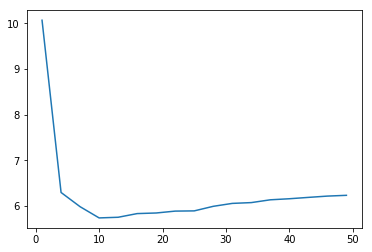

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
mse = []
for k in np.arange(1,50,3):
    knn = neighbors.KNeighborsRegressor(n_neighbors=k, metric = 'euclidean')
    knn.fit(data_scaled, y)
    y_pred_test = knn.predict(test_scaled)
    mse_test = mean_squared_error(y_pred_test, test_y)
    mse.append(mse_test)
plt.plot(np.arange(1,50,3), mse)